q table을 처음에 0으로만 초기화하면 학습이 안 됨

In [15]:
import gymnasium
import numpy as np
import torch

In [16]:
env = gymnasium.make('FrozenLake-v1', is_slippery=False)

In [17]:
q = torch.empty([env.observation_space.n, env.action_space.n]).uniform_(0, 0.1).requires_grad_()

In [18]:
q

tensor([[0.0744, 0.0279, 0.0698, 0.0102],
        [0.0704, 0.0815, 0.0199, 0.0975],
        [0.0182, 0.0240, 0.0611, 0.0958],
        [0.0162, 0.0013, 0.0207, 0.0747],
        [0.0579, 0.0272, 0.0833, 0.0828],
        [0.0692, 0.0038, 0.0269, 0.0043],
        [0.0917, 0.0494, 0.0114, 0.0321],
        [0.0665, 0.0246, 0.0109, 0.0616],
        [0.0888, 0.0862, 0.0533, 0.0531],
        [0.0074, 0.0040, 0.0920, 0.0560],
        [0.0883, 0.0731, 0.0504, 0.0515],
        [0.0493, 0.0736, 0.0425, 0.0166],
        [0.0428, 0.0259, 0.0797, 0.0794],
        [0.0656, 0.0001, 0.0671, 0.0685],
        [0.0621, 0.0397, 0.0799, 0.0469],
        [0.0380, 0.0297, 0.0609, 0.0651]], requires_grad=True)

In [19]:
gamma = 0.99
lr = 0.1
num_episodes = 2000

In [20]:
x = torch.nn.functional.one_hot(torch.tensor(3), num_classes=env.observation_space.n).float()
x @ q

tensor([0.0162, 0.0013, 0.0207, 0.0747], grad_fn=<SqueezeBackward4>)

In [21]:
action = torch.randint(env.action_space.n, (1,))
action

tensor([3])

In [22]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD([q], lr=lr)

In [23]:
running_rewards = []
processed_stage = []
for i in range(num_episodes):
    cur_observation, info = env.reset()
    running_reward = 0
    max_stage = 100
    for j in range(max_stage):
        cur_q = q[cur_observation]
        eps = 1 / (10 + i / 50)
        if np.random.random() < eps:
            action = np.random.randint(env.action_space.n)
        else:
            action = torch.argmax(cur_q).cpu().detach().item()
        nxt_observation, reward, terminated, truncated, info = env.step(action)
        running_reward += reward
        nxt_q = q[nxt_observation]
        target_q = cur_q.clone()
        target_q[action] = reward + gamma * torch.max(nxt_q)
        loss = criterion(target_q, cur_q)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_observation = nxt_observation
        if terminated:
            break
    running_rewards.append(running_reward)
    processed_stage.append(j)

In [24]:
import matplotlib.pyplot as plt

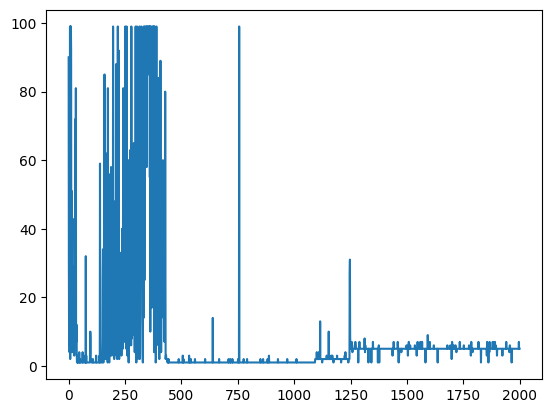

In [25]:
plt.plot(processed_stage)

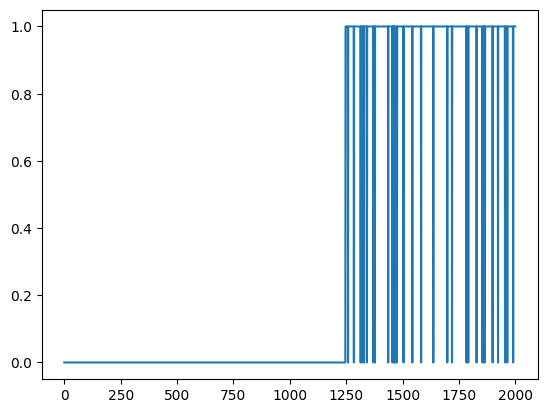

In [26]:
plt.plot(running_rewards)

In [27]:
sum(running_rewards) / len(running_rewards)

0.3615

In [28]:
q

tensor([[ 2.3679e-01,  2.7493e-01,  6.0499e-02,  2.0219e-01],
        [ 1.0767e-01,  6.0928e-02,  5.9305e-02,  5.8407e-02],
        [ 4.2250e-02,  5.9952e-02,  5.0408e-02,  5.2689e-02],
        [ 4.0457e-02,  2.9473e-02,  4.5854e-02,  5.0942e-02],
        [ 1.9146e-01,  2.7682e-01,  5.9541e-02,  2.0230e-01],
        [ 5.9497e-02,  3.8188e-03,  2.6939e-02,  4.3048e-03],
        [ 5.8226e-02,  5.7003e-02,  1.9452e-02,  3.7772e-02],
        [ 4.7859e-02,  2.4590e-02,  1.0884e-02,  4.4315e-02],
        [ 1.1005e-01,  6.6833e-02,  2.8271e-01,  2.0889e-01],
        [ 1.9950e-01,  1.2748e-01,  2.8872e-01,  5.8722e-02],
        [ 2.0549e-01,  2.9388e-01,  6.1418e-02,  5.6157e-02],
        [ 4.9337e-02,  6.2705e-02,  4.2548e-02,  1.6613e-02],
        [ 4.2833e-02,  2.5897e-02,  6.7439e-02,  6.7439e-02],
        [ 5.8299e-02,  1.0734e-04,  2.2815e-01,  5.5837e-02],
        [ 1.5627e-01,  2.5081e-01,  2.9841e-01,  2.1388e-01],
        [-7.0760e-01, -7.0767e-01, -7.0753e-01, -7.0776e-01]],
       